In [1]:
# Libraries and Dependencies
# for data manipulation and numerical operations
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from pathlib import Path
import missingno as msno

import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from datetime import datetime


In [2]:
# # Store filepath in a variable
file = Path("finance_data.csv")

In [3]:
# Read the raw data with the Pandas library
raw_df = pd.read_csv(file)
raw_df.head(20)

,id,items,ticker,competitor,total_receivables,total_assets,cash_and_short_term_inv,total_liabilities,total_debt,total_equity,...,debt_to_equity,gross_profit_margin,net_inc_margin,quick_ratio,return_on_assets,return_on_equity,operating_margin,working_capital,working_cap_turnover,equity_ratio
0,DELLQ32023,Q3 2023,DELL,AAPL,16346.0,85172,4909.0,88641,27329,-3469,...,-7.878063,0.230856,0.009911,0.408695,0.002877,-0.070626,0.030824,-13220.0,-1.869970,-0.040729
1,DELLQ42023,Q4 2023,DELL,AAPL,17763.0,89611,8607.0,92733,29588,-3122,...,-9.477258,0.229881,0.024522,0.510512,0.006852,-0.196669,0.051719,-9303.0,-2.691497,-0.034839
2,DELLQ12024,Q1 2024,DELL,AAPL,14412.0,84094,7631.0,87117,28432,-3023,...,-9.405227,0.239843,0.027865,0.470753,0.006933,-0.192855,0.051095,-9433.0,-2.217958,-0.035948
3,DELLQ22024,Q2 2024,DELL,AAPL,15158.0,85658,8364.0,88430,27138,-2772,...,-9.790043,0.234891,0.020145,0.461741,0.005394,-0.166667,0.050798,-11943.0,-1.920288,-0.032361
4,DELLQ32024,Q3 2024,DELL,AAPL,14260.0,83264,8298.0,85928,26617,-2664,...,-9.991366,0.231360,0.045211,0.461526,0.012082,-0.377628,0.066784,-11890.0,-1.871405,-0.031995
5,HPEQ42022,Q4 2022,HPE,AAPL,7623.0,57123,4163.0,37259,12465,19864,...,0.627517,0.329437,-0.038623,0.508587,-0.005322,-0.015304,-0.045610,-2668.0,-2.950150,0.347741
6,HPEQ12023,Q1 2023,HPE,AAPL,7927.0,55591,2530.0,35580,12926,20011,...,0.645945,0.340376,0.064157,0.486916,0.009012,0.025036,0.075554,-3242.0,-2.408698,0.359968
7,HPEQ22023,Q2 2023,HPE,AAPL,7427.0,55549,2781.0,35183,13376,20366,...,0.656781,0.360247,0.059946,0.504074,0.007525,0.020524,0.075434,-2691.0,-2.591230,0.366631
8,HPEQ32023,Q3 2023,HPE,AAPL,7166.0,56415,2919.0,35793,13352,20622,...,0.647464,0.358469,0.066267,0.500000,0.008225,0.022500,0.073693,-2515.0,-2.784095,0.365541
9,HPEQ42023,Q4 2023,HPE,AAPL,7024.0,57153,4270.0,35971,12355,21182,...,0.583278,0.348116,0.087335,0.516132,0.011233,0.030309,0.069650,-2934.0,-2.505453,0.370619


In [4]:
# Print out columns names
raw_df.columns

Index(['id', 'items', 'ticker', 'competitor', 'total_receivables',
       'total_assets', 'cash_and_short_term_inv', 'total_liabilities',
       'total_debt', 'total_equity', 'cost_of_revenue', 'gross_profit',
       'operating_income', 'interest_expense', 'interest_coverage',
       'total_cost_of_revenue', 'total_inventory', 'inventory_turnover',
       'total_revenue', 'net_income', 'quick_assets', 'tot_curr_assets',
       'total_current_liab', 'accounts_receivable_turnover',
       'avg_collection_period', 'assets_turnover', 'basic_earning_power',
       'cash_ratio', 'current_ratio', 'debt_ratio', 'debt_to_equity',
       'gross_profit_margin', 'net_inc_margin', 'quick_ratio',
       'return_on_assets', 'return_on_equity', 'operating_margin',
       'working_capital', 'working_cap_turnover', 'equity_ratio'],
      dtype='object')

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25090 entries, 0 to 25089
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            25090 non-null  object 
 1   items                         25090 non-null  object 
 2   ticker                        25090 non-null  object 
 3   competitor                    25090 non-null  object 
 4   total_receivables             21519 non-null  float64
 5   total_assets                  25090 non-null  int64  
 6   cash_and_short_term_inv       21873 non-null  float64
 7   total_liabilities             25090 non-null  int64  
 8   total_debt                    25090 non-null  int64  
 9   total_equity                  25090 non-null  int64  
 10  cost_of_revenue               20156 non-null  float64
 11  gross_profit                  20156 non-null  float64
 12  operating_income              23988 non-null  float64
 13  i

<Axes: >

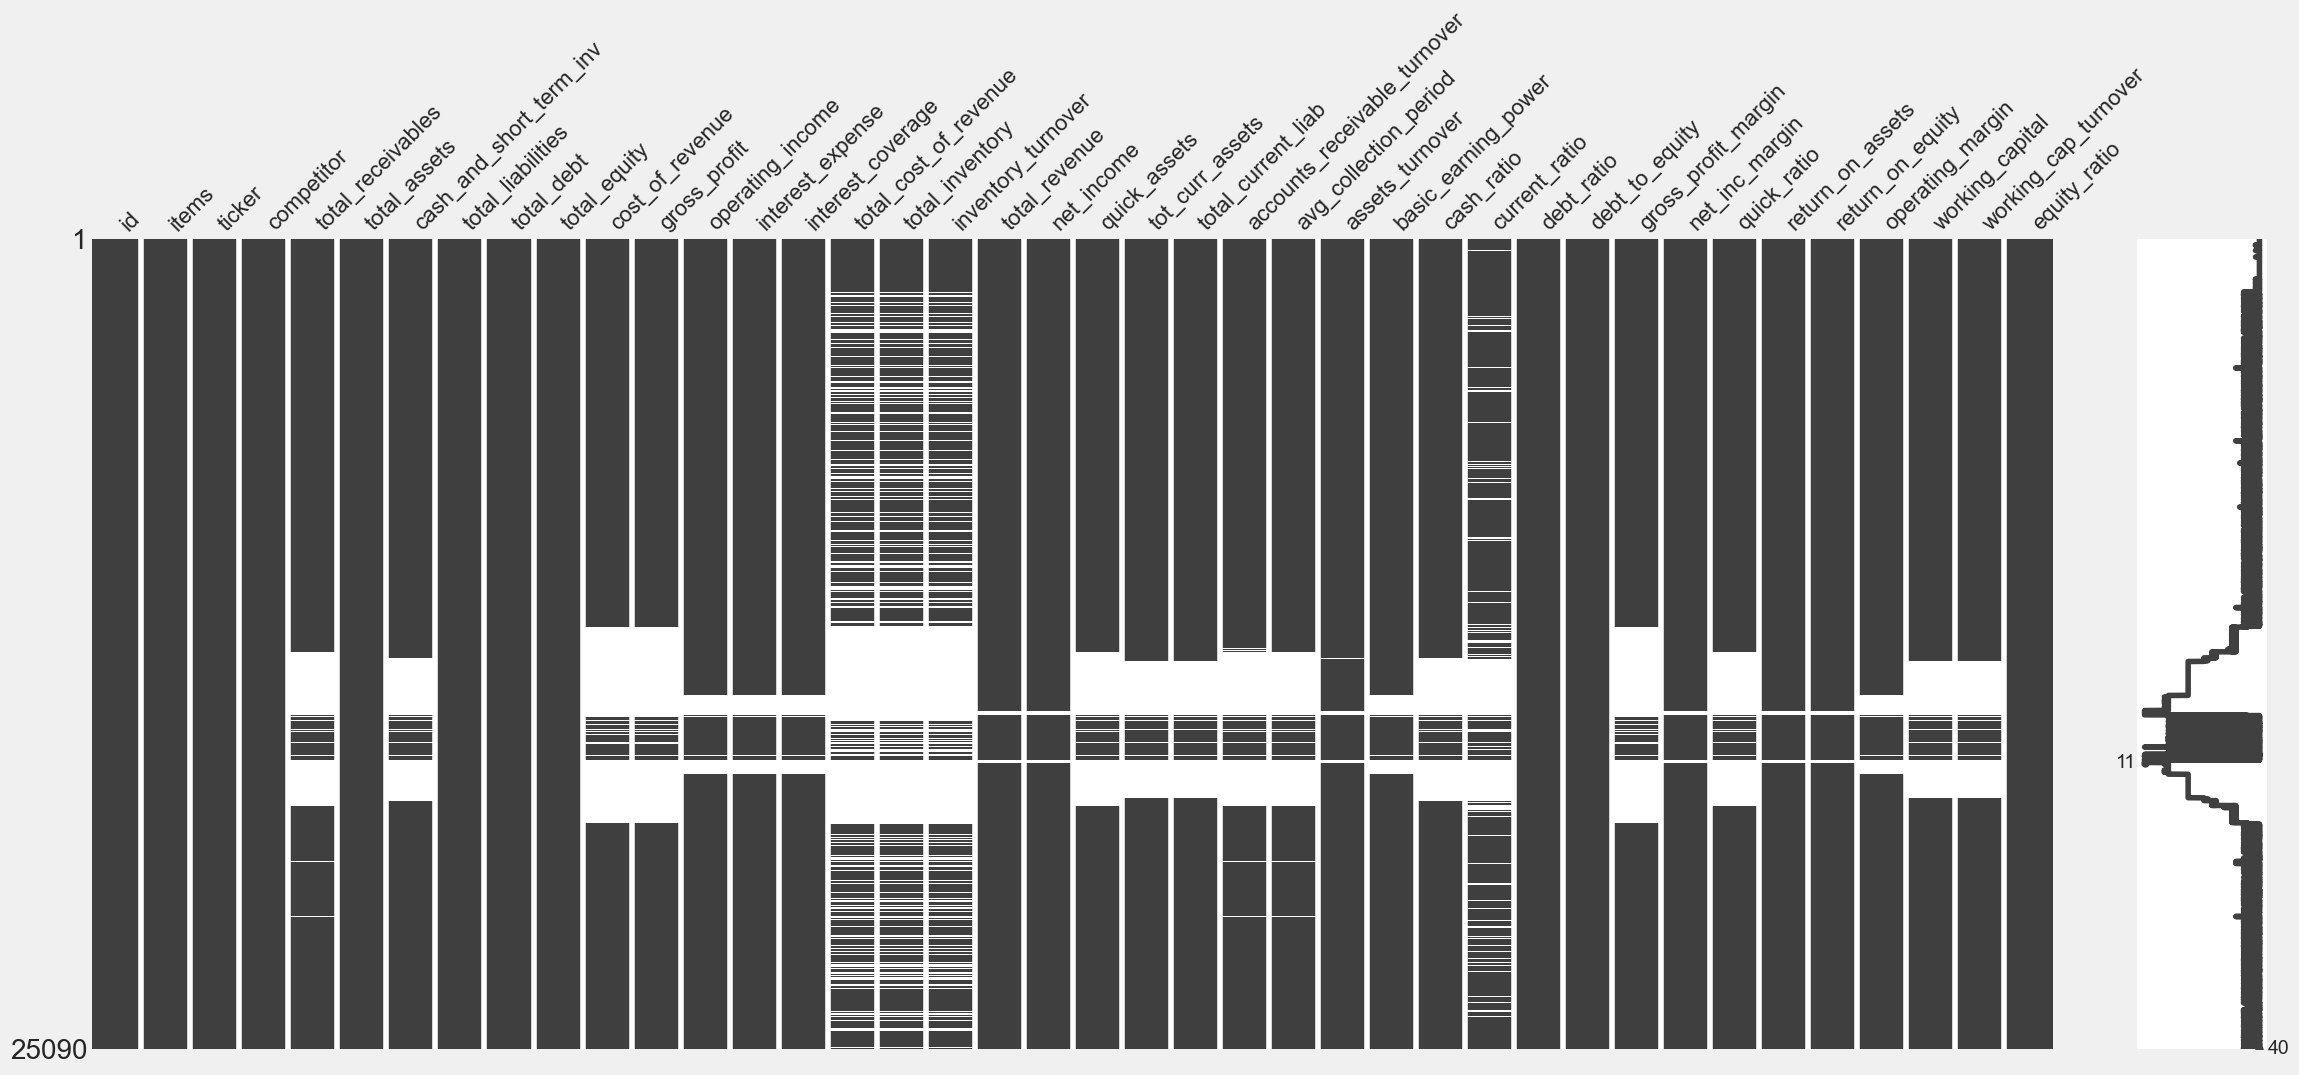

In [6]:
# Plot the dataset
msno.matrix(raw_df)

In [7]:
# Finding NAN values
nan_values = raw_df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/raw_df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
inventory_turnover,9785,39.00
total_inventory,9784,39.00
total_cost_of_revenue,9783,38.99
current_ratio,5010,19.97
gross_profit_margin,4950,19.73
cost_of_revenue,4934,19.67
gross_profit,4934,19.67
accounts_receivable_turnover,3606,14.37
avg_collection_period,3571,14.23
total_receivables,3571,14.23


In [8]:
# Or check NULL values
raw_df.isnull().sum().sort_values(ascending=False)

inventory_turnover              9785
total_inventory                 9784
total_cost_of_revenue           9783
current_ratio                   5010
gross_profit_margin             4950
cost_of_revenue                 4934
gross_profit                    4934
accounts_receivable_turnover    3606
avg_collection_period           3571
total_receivables               3571
quick_assets                    3563
quick_ratio                     3563
cash_ratio                      3219
cash_and_short_term_inv         3217
working_cap_turnover            3001
total_current_liab              3001
tot_curr_assets                 3001
working_capital                 3001
interest_coverage               1105
interest_expense                1102
operating_income                1102
basic_earning_power             1102
operating_margin                1102
assets_turnover                  232
total_revenue                    226
net_income                       226
net_inc_margin                   226
r

In [9]:
# Check and Drop duplicate rows based on all columns
raw_df = raw_df.drop_duplicates()

# Print the DataFrame to see the changes
raw_df

,id,items,ticker,competitor,total_receivables,total_assets,cash_and_short_term_inv,total_liabilities,total_debt,total_equity,...,debt_to_equity,gross_profit_margin,net_inc_margin,quick_ratio,return_on_assets,return_on_equity,operating_margin,working_capital,working_cap_turnover,equity_ratio
0,DELLQ32023,Q3 2023,DELL,AAPL,16346.0,85172,4909.0,88641,27329,-3469,...,-7.878063,0.230856,0.009911,0.408695,0.002877,-0.070626,0.030824,-13220.0,-1.869970,-0.040729
1,DELLQ42023,Q4 2023,DELL,AAPL,17763.0,89611,8607.0,92733,29588,-3122,...,-9.477258,0.229881,0.024522,0.510512,0.006852,-0.196669,0.051719,-9303.0,-2.691497,-0.034839
2,DELLQ12024,Q1 2024,DELL,AAPL,14412.0,84094,7631.0,87117,28432,-3023,...,-9.405227,0.239843,0.027865,0.470753,0.006933,-0.192855,0.051095,-9433.0,-2.217958,-0.035948
3,DELLQ22024,Q2 2024,DELL,AAPL,15158.0,85658,8364.0,88430,27138,-2772,...,-9.790043,0.234891,0.020145,0.461741,0.005394,-0.166667,0.050798,-11943.0,-1.920288,-0.032361
4,DELLQ32024,Q3 2024,DELL,AAPL,14260.0,83264,8298.0,85928,26617,-2664,...,-9.991366,0.231360,0.045211,0.461526,0.012082,-0.377628,0.066784,-11890.0,-1.871405,-0.031995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25085,MEGQ42023,Q4 2023,MEG,WM,164.0,817,23.0,343,175,474,...,0.369198,0.385074,-0.008694,1.484127,-1.763770,-3.040084,-0.053764,75.0,2209.893333,0.580171
25086,DRIQ32024,Q3 2024,DRI,YUM,72.0,11358,244.0,9177,2840,2181,...,1.302155,0.217143,0.105210,0.139085,0.027558,0.143512,0.130084,-1396.0,-2.131089,0.192023
25087,IDXXQ12024,Q1 2024,IDXX,ZBH,578.0,3354,397.0,1785,946,1569,...,0.602932,0.615145,0.244813,1.018809,0.070364,0.150414,0.310166,545.0,1.768807,0.467800
25088,DXCMQ12024,Q1 2024,DXCM,ZBH,985.0,6482,2897.0,4235,2494,2247,...,1.109924,0.610206,0.158523,2.435383,0.022524,0.064976,0.109663,3027.0,0.304262,0.346652


In [10]:
# Statistical analysis for categorical data in dataset
raw_df.describe(include='O')

,id,items,ticker,competitor
count,25090,25090,25090,25090
unique,7230,77,1262,500
top,NEEQ32023,Q4 2023,NEE,EIX
freq,17,4276,102,67


In [11]:
# Statistical analysis for numerical data in dataset
raw_df.describe()

,total_receivables,total_assets,cash_and_short_term_inv,total_liabilities,total_debt,total_equity,cost_of_revenue,gross_profit,operating_income,interest_expense,...,debt_to_equity,gross_profit_margin,net_inc_margin,quick_ratio,return_on_assets,return_on_equity,operating_margin,working_capital,working_cap_turnover,equity_ratio
count,21519.000000,2.509000e+04,21873.000000,2.509000e+04,2.509000e+04,25090.000000,2.015600e+04,20156.000000,23988.000000,23988.000000,...,2.508000e+04,20140.000000,2.486400e+04,2.152700e+04,2.486400e+04,2.486400e+04,2.398800e+04,22089.000000,2.208900e+04,2.509000e+04
mean,3897.776941,7.148198e+04,4567.648516,5.486882e+04,1.642880e+04,16613.171582,2.150689e+04,22013.409506,5144.069118,2485.997582,...,inf,0.464170,NaN,inf,NaN,-inf,NaN,3451.481235,1.030595e+04,-inf
std,11806.502246,2.675111e+05,19639.307281,2.419217e+05,6.067189e+04,40227.141076,6.026832e+04,61563.994265,30823.092165,9644.774944,...,NaN,0.271736,NaN,NaN,NaN,NaN,NaN,20371.036448,5.841316e+04,NaN
min,0.000000,0.000000e+00,0.000000,-1.101900e+04,0.000000e+00,-100641.000000,-8.218000e+03,-33100.000000,-525417.000000,-25.000000,...,-1.484500e+03,-6.060606,-inf,0.000000e+00,-inf,-inf,-inf,-126538.000000,-3.620000e+05,-inf
25%,421.500000,5.453000e+03,229.000000,3.049000e+03,1.231000e+03,1540.250000,5.880000e+02,542.000000,117.000000,24.000000,...,2.808981e-01,0.298958,3.026007e-02,5.727282e-01,3.233169e-03,1.161077e-02,5.724001e-02,1.000000,1.058846e-01,2.001640e-01
50%,1006.000000,1.529200e+04,698.000000,8.986000e+03,4.104000e+03,4886.000000,1.604000e+03,1282.000000,365.000000,76.000000,...,6.693202e-01,0.446809,9.886617e-02,9.612418e-01,1.355990e-02,3.698822e-02,1.429369e-01,521.000000,1.219512e+00,3.521484e-01
75%,2724.500000,5.074100e+04,2295.000000,3.329850e+04,1.286500e+04,14725.000000,5.583000e+03,4138.500000,1216.500000,300.000000,...,1.421242e+00,0.646274,1.818182e-01,1.647335e+00,3.220951e-02,8.331974e-02,2.384369e-01,1836.000000,5.670040e+00,5.277660e-01
max,222269.000000,4.090727e+06,504108.000000,3.754090e+06,1.101976e+06,432301.000000,1.000100e+06,926084.000000,396503.000000,279765.000000,...,inf,2.128226,inf,inf,inf,9.983222e+03,inf,452188.000000,1.799995e+06,1.111380e+00


In [12]:
# How many stock ID?
len(raw_df["ticker"].unique())

1262

In [13]:
raw_df.ticker.value_counts()

ticker
NEE     102
ABT      90
RMD      84
ETR      79
EIX      79
       ... 
RSI       5
HTOO      3
FIHL      3
HG        3
MRT       2
Name: count, Length: 1262, dtype: int64

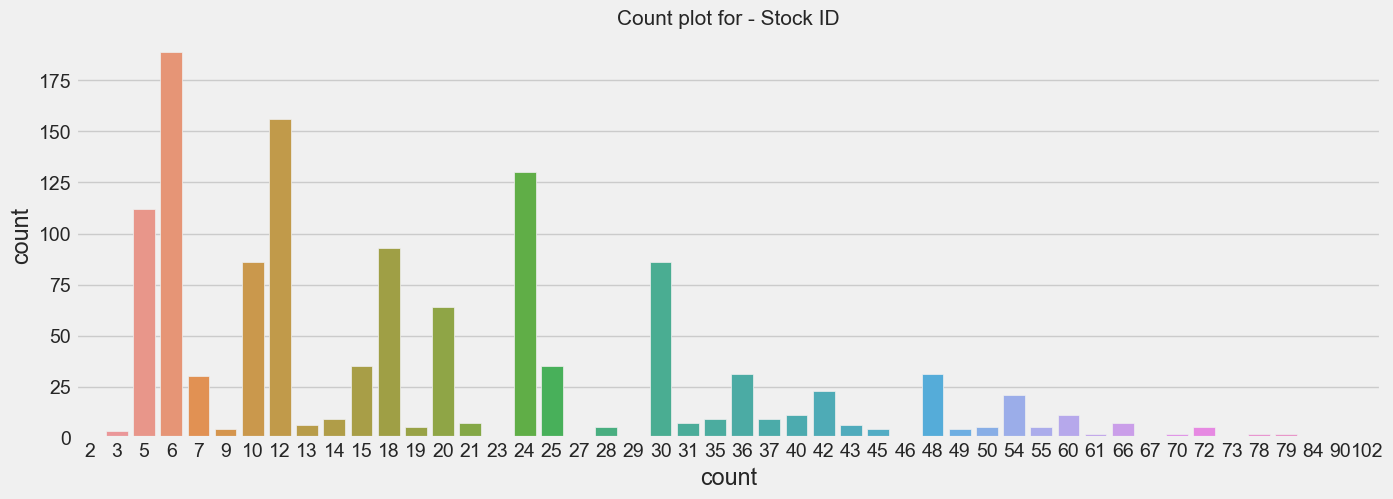

In [14]:
# count plot for Stock ID "ticker"
plt.figure(figsize=(15,5))
sns.countplot(x=raw_df.ticker.value_counts())
plt.title('Count plot for - Stock ID' ,fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [15]:
# Check only DELL
dell_df = raw_df[raw_df['ticker']=='DELL']
dell_df

,id,items,ticker,competitor,total_receivables,total_assets,cash_and_short_term_inv,total_liabilities,total_debt,total_equity,...,debt_to_equity,gross_profit_margin,net_inc_margin,quick_ratio,return_on_assets,return_on_equity,operating_margin,working_capital,working_cap_turnover,equity_ratio
0,DELLQ32023,Q3 2023,DELL,AAPL,16346.0,85172,4909.0,88641,27329,-3469,...,-7.878063,0.230856,0.009911,0.408695,0.002877,-0.070626,0.030824,-13220.0,-1.869970,-0.040729
1,DELLQ42023,Q4 2023,DELL,AAPL,17763.0,89611,8607.0,92733,29588,-3122,...,-9.477258,0.229881,0.024522,0.510512,0.006852,-0.196669,0.051719,-9303.0,-2.691497,-0.034839
2,DELLQ12024,Q1 2024,DELL,AAPL,14412.0,84094,7631.0,87117,28432,-3023,...,-9.405227,0.239843,0.027865,0.470753,0.006933,-0.192855,0.051095,-9433.0,-2.217958,-0.035948
3,DELLQ22024,Q2 2024,DELL,AAPL,15158.0,85658,8364.0,88430,27138,-2772,...,-9.790043,0.234891,0.020145,0.461741,0.005394,-0.166667,0.050798,-11943.0,-1.920288,-0.032361
4,DELLQ32024,Q3 2024,DELL,AAPL,14260.0,83264,8298.0,85928,26617,-2664,...,-9.991366,0.231360,0.045211,0.461526,0.012082,-0.377628,0.066784,-11890.0,-1.871405,-0.031995
2036,DELLQ12024,Q1 2024,DELL,HPQ,14412.0,84094,7631.0,87117,28432,-3023,...,-9.405227,0.239843,0.027865,0.470753,0.006933,-0.192855,0.051095,-9433.0,-2.217958,-0.035948
2037,DELLQ32024,Q3 2024,DELL,HPQ,14260.0,83264,8298.0,85928,26617,-2664,...,-9.991366,0.231360,0.045211,0.461526,0.012082,-0.377628,0.066784,-11890.0,-1.871405,-0.031995
2280,DELLQ12024,Q1 2024,DELL,NTAP,14412.0,84094,7631.0,87117,28432,-3023,...,-9.405227,0.239843,0.027865,0.470753,0.006933,-0.192855,0.051095,-9433.0,-2.217958,-0.035948
2591,DELLQ42023,Q4 2023,DELL,WDC,17763.0,89611,8607.0,92733,29588,-3122,...,-9.477258,0.229881,0.024522,0.510512,0.006852,-0.196669,0.051719,-9303.0,-2.691497,-0.034839
2592,DELLQ12024,Q1 2024,DELL,WDC,14412.0,84094,7631.0,87117,28432,-3023,...,-9.405227,0.239843,0.027865,0.470753,0.006933,-0.192855,0.051095,-9433.0,-2.217958,-0.035948


In [16]:
# Check only NEE
nee_df = raw_df[raw_df['ticker']=='NEE']
nee_df

,id,items,ticker,competitor,total_receivables,total_assets,cash_and_short_term_inv,total_liabilities,total_debt,total_equity,...,debt_to_equity,gross_profit_margin,net_inc_margin,quick_ratio,return_on_assets,return_on_equity,operating_margin,working_capital,working_cap_turnover,equity_ratio
12042,NEEQ42022,Q4 2022,NEE,EIX,5093.0,158935,1601.0,119706,64966,39229,...,1.656071,NaN,0.246918,0.250759,0.009576,0.038798,0.331927,-13205.0,-0.466793,0.246824
12053,NEEQ12023,Q1 2023,NEE,LNT,3932.0,165357,2275.0,122461,70641,42896,...,1.646797,NaN,0.310602,0.244592,0.012615,0.048629,0.438058,-11828.0,-0.567805,0.259414
12065,NEEQ42023,Q4 2023,NEE,NRG,6040.0,177489,2690.0,130021,73211,47468,...,1.542323,NaN,0.175923,0.312198,0.006817,0.025491,0.386740,-12602.0,-0.545786,0.267442
12071,NEEQ12023,Q1 2023,NEE,PNW,3932.0,165357,2275.0,122461,70641,42896,...,1.646797,NaN,0.310602,0.244592,0.012615,0.048629,0.438058,-11828.0,-0.567805,0.259414
12085,NEEQ12024,Q1 2024,NEE,AEP,5195.0,179950,1642.0,131309,79937,48641,...,1.643408,NaN,0.395742,0.275652,0.012604,0.046627,0.351248,-12123.0,-0.472738,0.270303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18001,NEEQ12023,Q1 2023,NEE,XEL,3932.0,165357,2275.0,122461,70641,42896,...,1.646797,NaN,0.310602,0.244592,0.012615,0.048629,0.438058,-11828.0,-0.567805,0.259414
18014,NEEQ12024,Q1 2024,NEE,NEE,5195.0,179950,1642.0,131309,79937,48641,...,1.643408,NaN,0.395742,0.275652,0.012604,0.046627,0.351248,-12123.0,-0.472738,0.270303
18025,NEEQ22023,Q2 2023,NEE,AEP,4594.0,168275,1577.0,123482,72173,44793,...,1.611256,NaN,0.380324,0.248120,0.016610,0.062398,0.380868,-11749.0,-0.625500,0.266189
18049,NEEQ12023,Q1 2023,NEE,ETR,3932.0,165357,2275.0,122461,70641,42896,...,1.646797,NaN,0.310602,0.244592,0.012615,0.048629,0.438058,-11828.0,-0.567805,0.259414


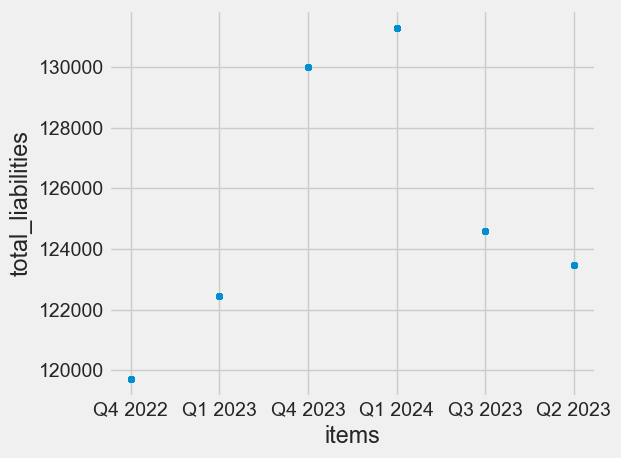

In [17]:
nee_df.plot(kind='scatter', x="items", y="total_liabilities")
plt.tight_layout()
plt.show()

In [18]:
raw_df.columns

Index(['id', 'items', 'ticker', 'competitor', 'total_receivables',
       'total_assets', 'cash_and_short_term_inv', 'total_liabilities',
       'total_debt', 'total_equity', 'cost_of_revenue', 'gross_profit',
       'operating_income', 'interest_expense', 'interest_coverage',
       'total_cost_of_revenue', 'total_inventory', 'inventory_turnover',
       'total_revenue', 'net_income', 'quick_assets', 'tot_curr_assets',
       'total_current_liab', 'accounts_receivable_turnover',
       'avg_collection_period', 'assets_turnover', 'basic_earning_power',
       'cash_ratio', 'current_ratio', 'debt_ratio', 'debt_to_equity',
       'gross_profit_margin', 'net_inc_margin', 'quick_ratio',
       'return_on_assets', 'return_on_equity', 'operating_margin',
       'working_capital', 'working_cap_turnover', 'equity_ratio'],
      dtype='object')

In [19]:
liquidity_ratios_df = raw_df[['current_ratio', 'cash_ratio', 'quick_ratio', 'working_capital']]
solvency_ratios_df = raw_df[['debt_ratio', 'debt_to_equity','equity_ratio', 'interest_coverage']]
activity_ratios_df = raw_df[['working_cap_turnover', 'inventory_turnover', 'assets_turnover', 'accounts_receivable_turnover', 'avg_collection_period']]
profit_ratios_df = raw_df[['net_inc_margin', 'gross_profit_margin', 'operating_margin', 'return_on_assets', 'return_on_equity', 'basic_earning_power']]

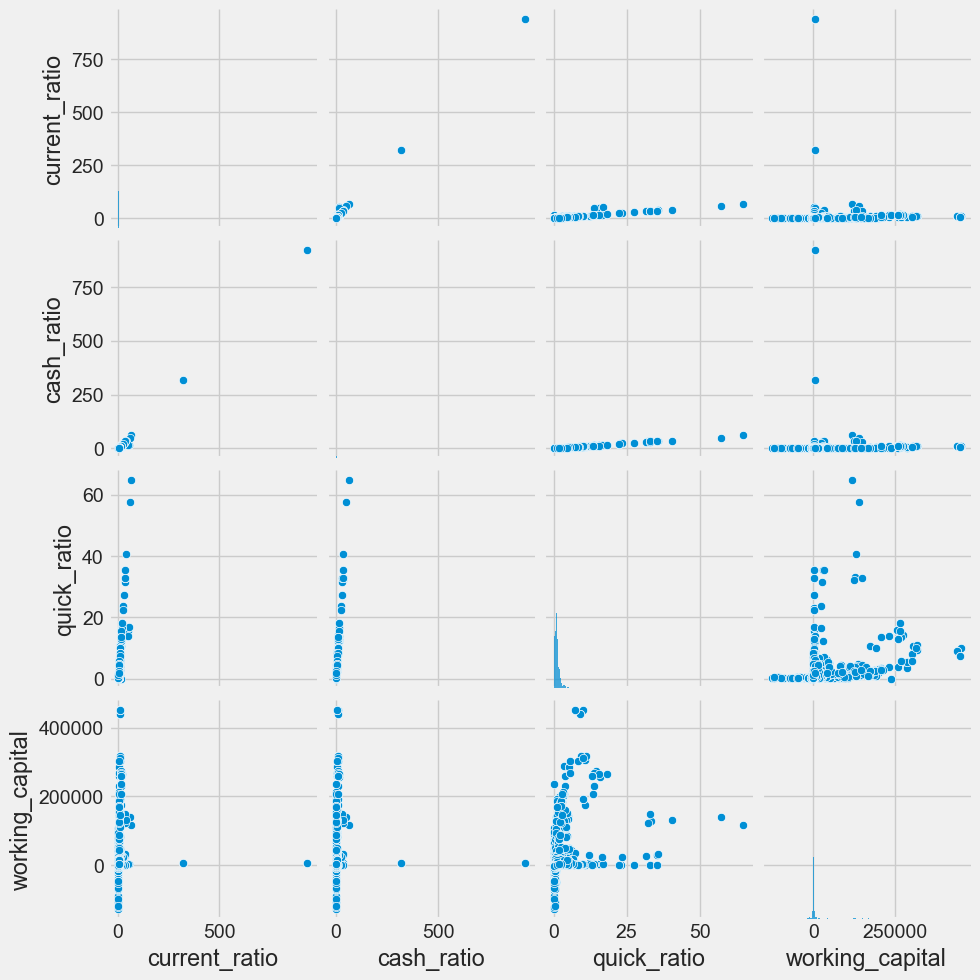

In [20]:
# Pair-Plot Liquidity Ratios
sns.pairplot(data=liquidity_ratios_df)
plt.show()

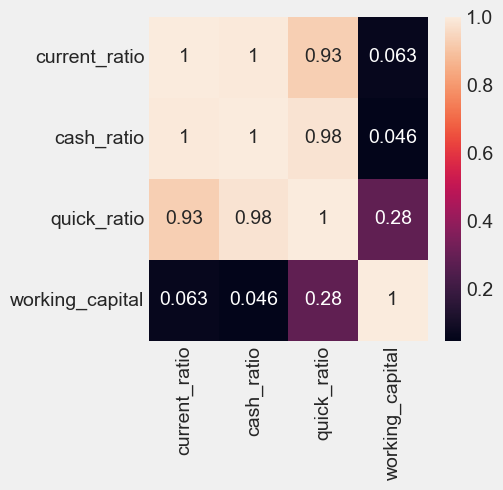

In [28]:
# Heatmap for Liquidity Ratios
plt.figure(figsize=(4,4))
sns.heatmap(liquidity_ratios_df.corr(), annot=True)
plt.show()

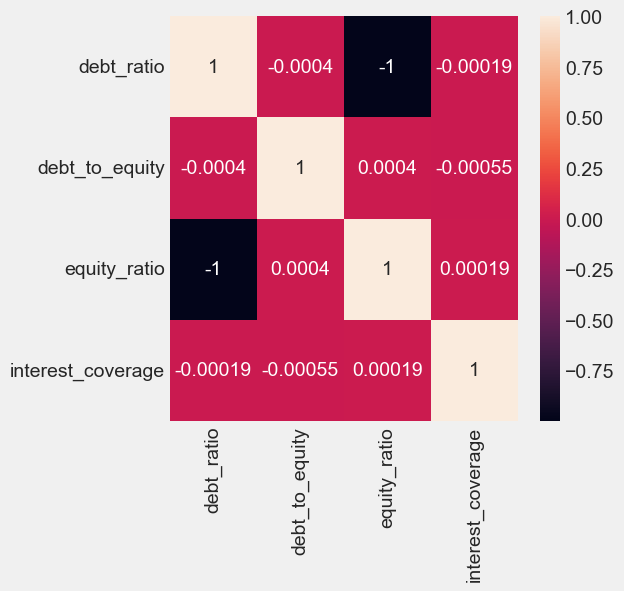

In [30]:
# Heatmap for Solvency Ratios
plt.figure(figsize=(5,5))
sns.heatmap(solvency_ratios_df.corr(), annot=True)
plt.show()

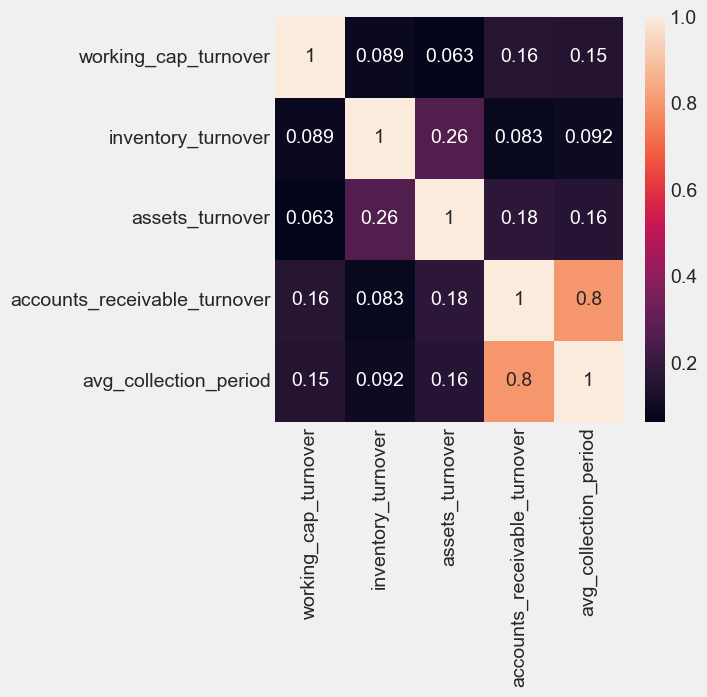

In [31]:
# Heatmap for Activity Ratios
plt.figure(figsize=(5,5))
sns.heatmap(activity_ratios_df.corr(), annot=True)
plt.show()

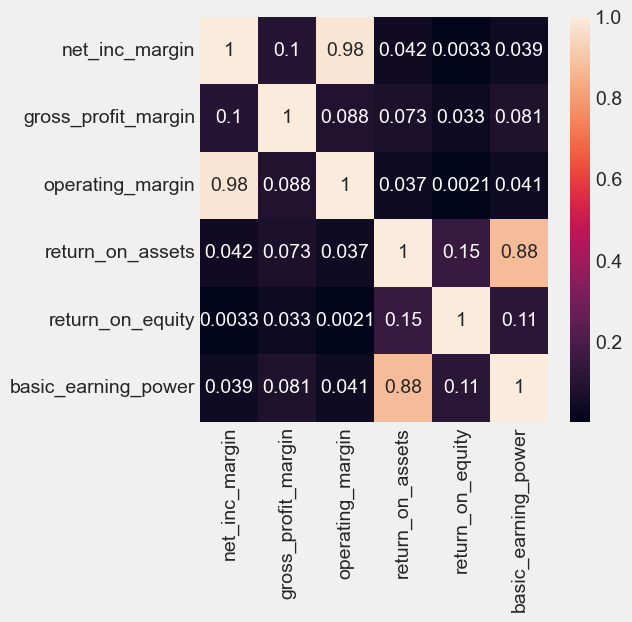

In [32]:
# Heatmap for Profitability Ratios
plt.figure(figsize=(5,5))
sns.heatmap(profit_ratios_df.corr(), annot=True)
plt.show()

In [21]:
# Select some colums
raw_num_df = raw_df[[
       'total_assets', 'total_liabilities',
       'total_debt', 'total_equity', 'gross_profit',
       'operating_income',  
       'total_revenue', 'net_income', 
       # 'total_current_liab', 'basic_earning_power',
       # 'debt_ratio', 'debt_to_equity',
       # 'equity_ratio', 'gross_profit_margin', 'net_inc_margin', 'quick_ratio',
       ]]

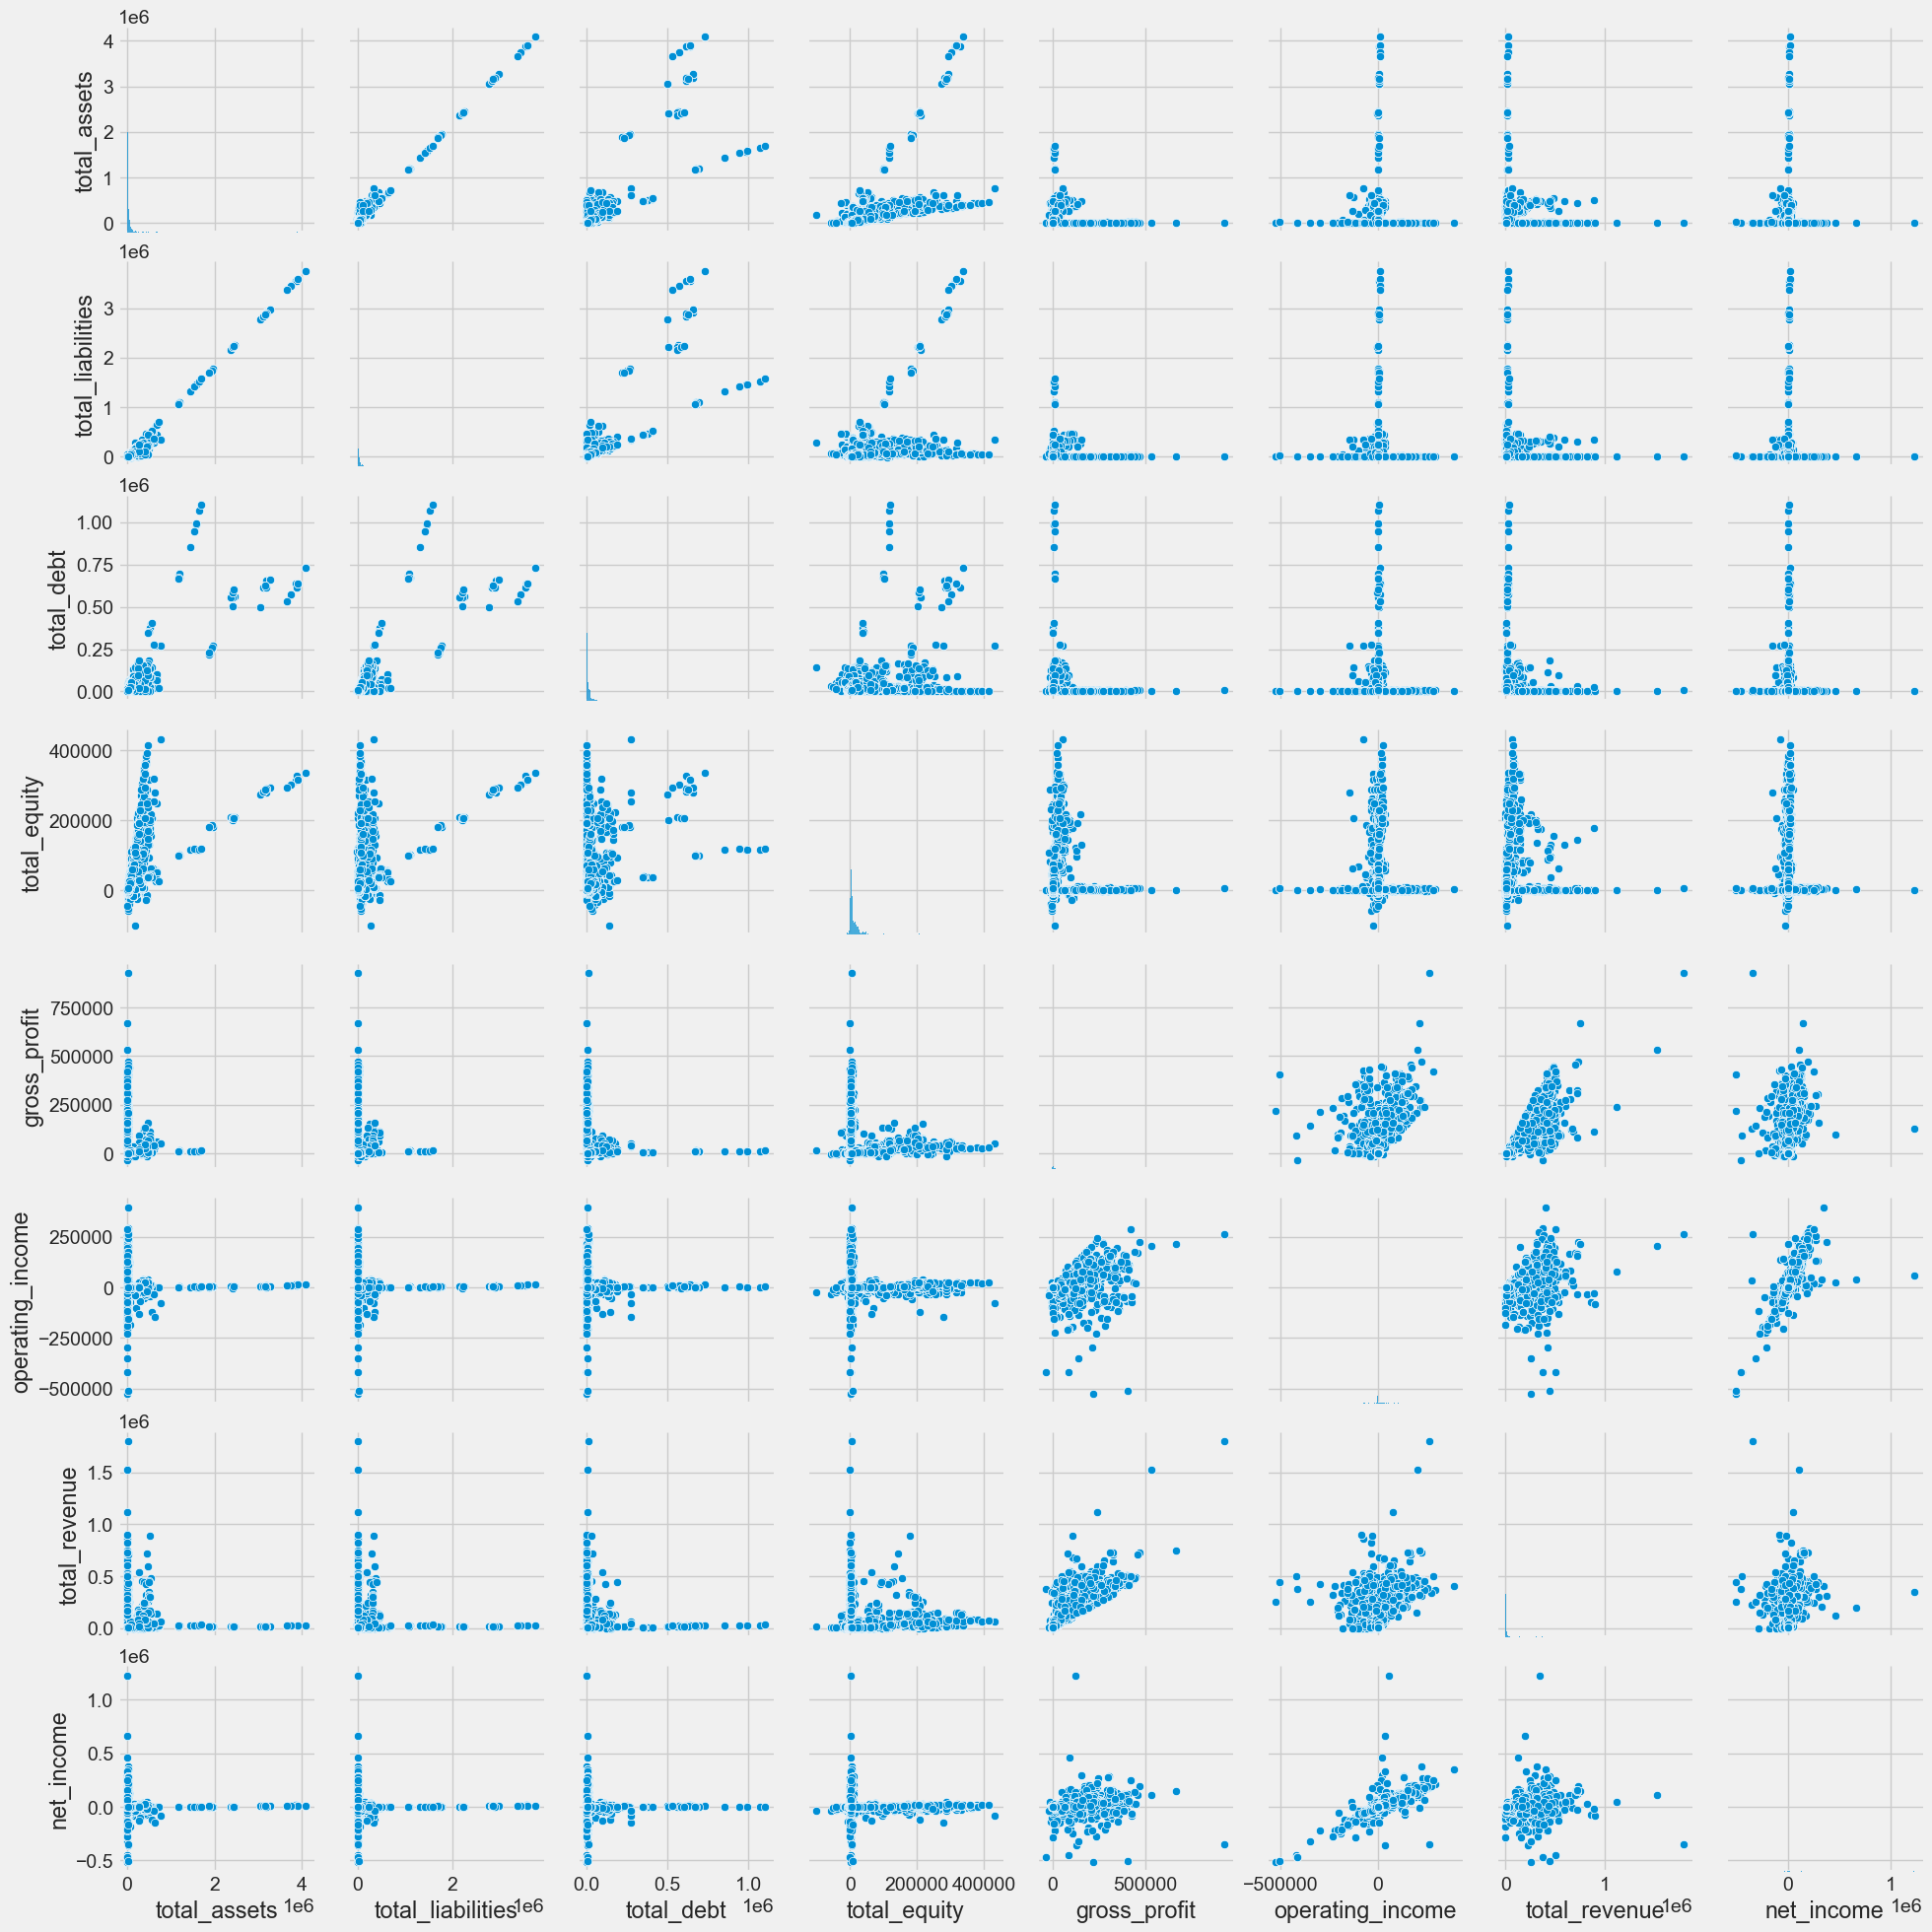

In [22]:
sns.pairplot(data=raw_num_df)
plt.show()

In [23]:
raw_num_df.corr()

,total_assets,total_liabilities,total_debt,total_equity,gross_profit,operating_income,total_revenue,net_income
total_assets,1.000000,0.992557,0.850824,0.680886,-0.044844,-0.011573,-0.044067,-0.004134
total_liabilities,0.992557,1.000000,0.852294,0.586625,-0.046093,-0.009431,-0.044428,-0.002418
total_debt,0.850824,0.852294,1.000000,0.532388,-0.048623,-0.015784,-0.054000,-0.008617
total_equity,0.680886,0.586625,0.532388,1.000000,-0.024156,-0.021456,-0.025875,-0.012976
gross_profit,-0.044844,-0.046093,-0.048623,-0.024156,1.000000,0.502125,0.902815,0.308712
operating_income,-0.011573,-0.009431,-0.015784,-0.021456,0.502125,1.000000,0.460901,0.744469
total_revenue,-0.044067,-0.044428,-0.054000,-0.025875,0.902815,0.460901,1.000000,0.284079
net_income,-0.004134,-0.002418,-0.008617,-0.012976,0.308712,0.744469,0.284079,1.000000


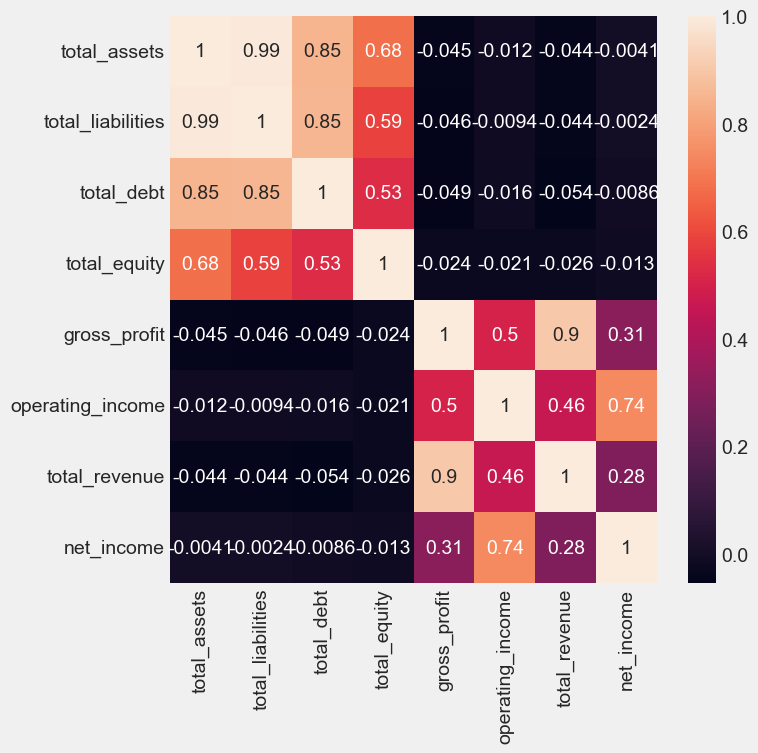

In [24]:
plt.figure(figsize=(7,7))
sns.heatmap(raw_num_df.corr(), annot=True)
plt.show()

Test of getting Stock price from Yahoo!Finance

In [25]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker = 'AAPL' # Apple Stock

# Get data on this ticker
stock = yf.Ticker(ticker)

# Get historical market data
hist = stock.history(period="1y")

# Calculate moving averages
hist['SMA50'] = hist['Close'].rolling(window=50).mean()
hist['SMA200'] = hist['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    average_gain = gain.rolling(window=window).mean()
    average_loss = loss.rolling(window=window).mean()
    rs = average_gain / average_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

hist['RSI'] = calculate_rsi(hist['Close'])

# Get financials (simplified)
# Use the information already available in yfinance
info = stock.info

# Print key financial information
print(f"Company: {info.get('longName')}")
print(f"Market Cap: {info.get('marketCap')}")
print(f"PE Ratio (TTM): {info.get('trailingPE')}")
print(f"EPS (TTM): {info.get('trailingEps')}")
print(f"Dividend Yield: {info.get('dividendYield')}")

# Print the recent stock data with calculated indicators
print(hist.tail())



Company: Apple Inc.
Market Cap: 2982175571968
PE Ratio (TTM): 30.292833
EPS (TTM): 6.42
Dividend Yield: 0.0050999997
                                 Open        High         Low       Close  \
Date                                                                        
2024-05-31 00:00:00-04:00  191.440002  192.570007  189.910004  192.250000   
2024-06-03 00:00:00-04:00  192.899994  194.990005  192.520004  194.029999   
2024-06-04 00:00:00-04:00  194.639999  195.320007  193.029999  194.350006   
2024-06-05 00:00:00-04:00  195.399994  196.899994  194.869995  195.869995   
2024-06-06 00:00:00-04:00  195.684998  196.500000  194.169998  194.479996   

                             Volume  Dividends  Stock Splits       SMA50  \
Date                                                                       
2024-05-31 00:00:00-04:00  75158300        0.0           0.0  177.008785   
2024-06-03 00:00:00-04:00  50080500        0.0           0.0  177.466627   
2024-06-04 00:00:00-04:00  47471400    